<a href="https://colab.research.google.com/github/canamac/zeka-can/blob/main/ziya_bey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
🚀 Teknik Analiz Başlatılıyor...

🔍 Analiz: BTC-USD


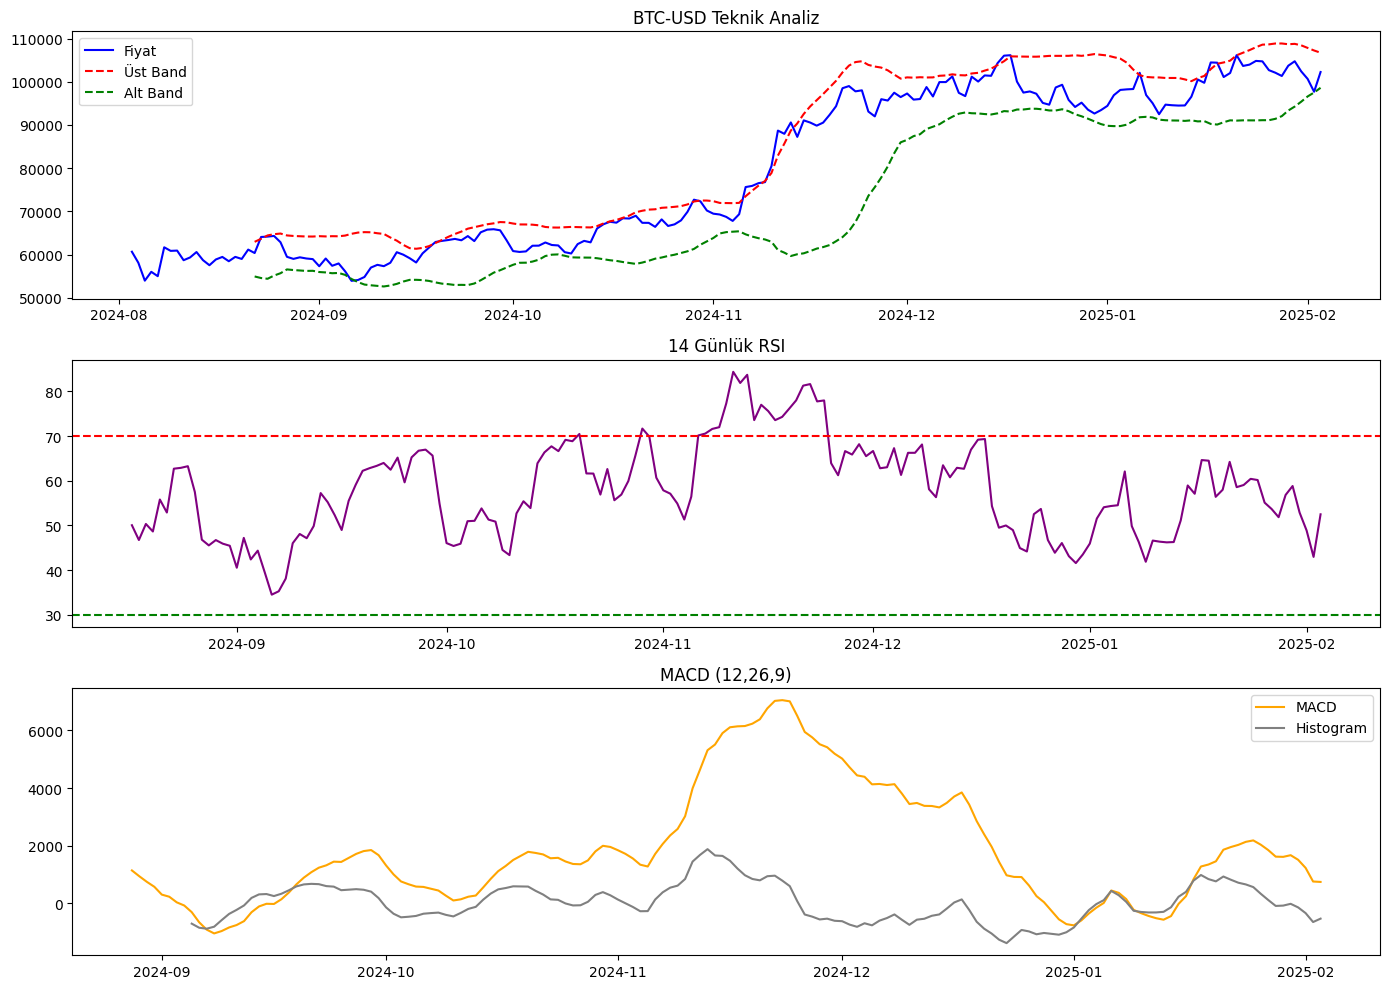


🔍 Analiz: ETH-USD


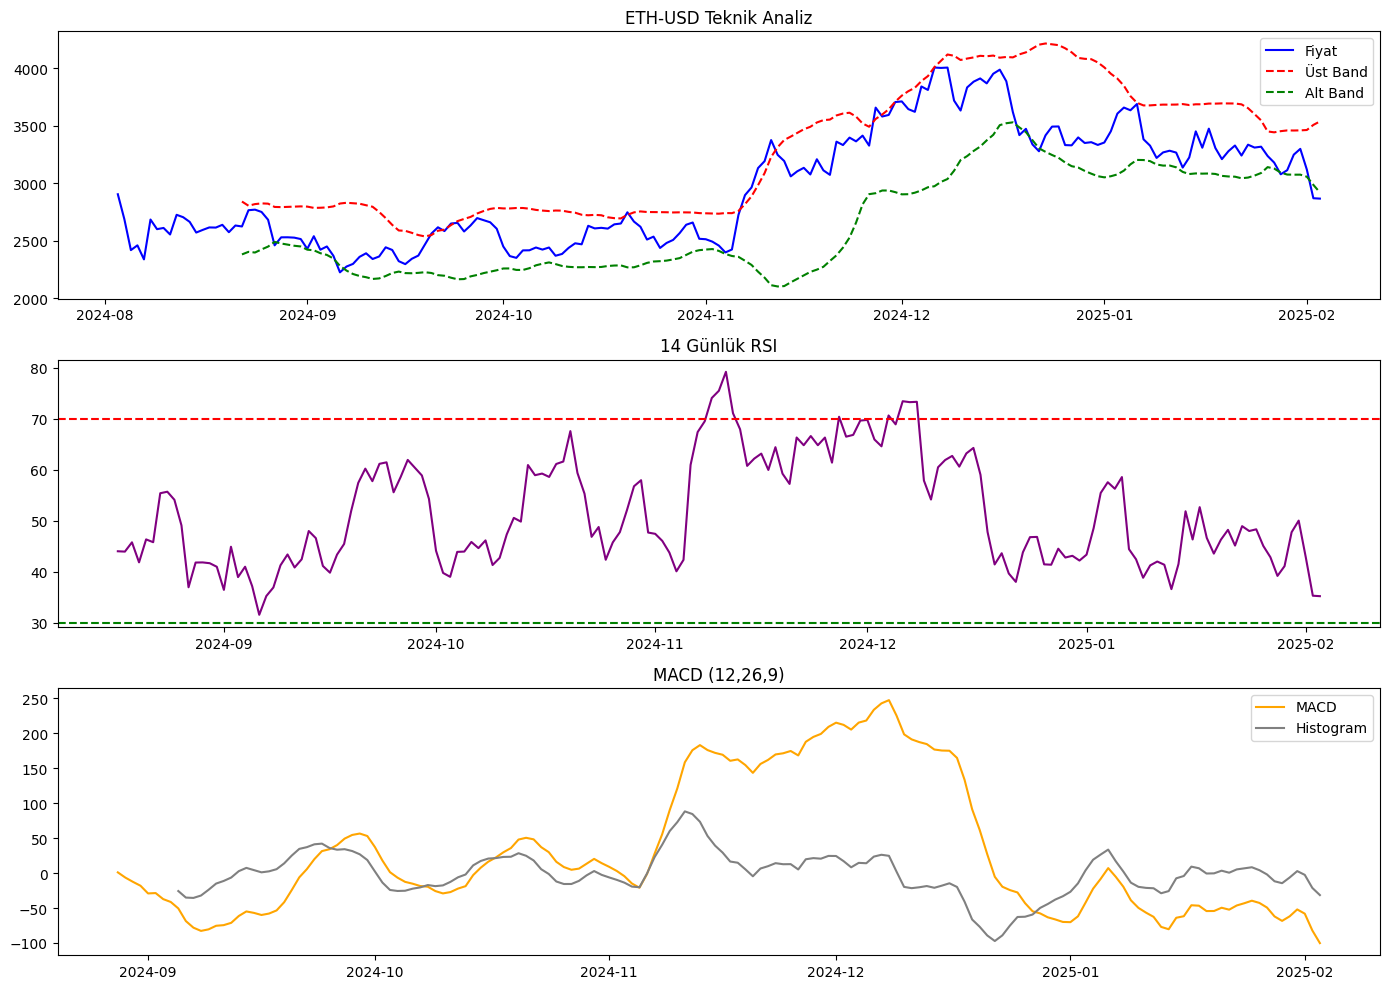


🔍 Analiz: BNB-USD


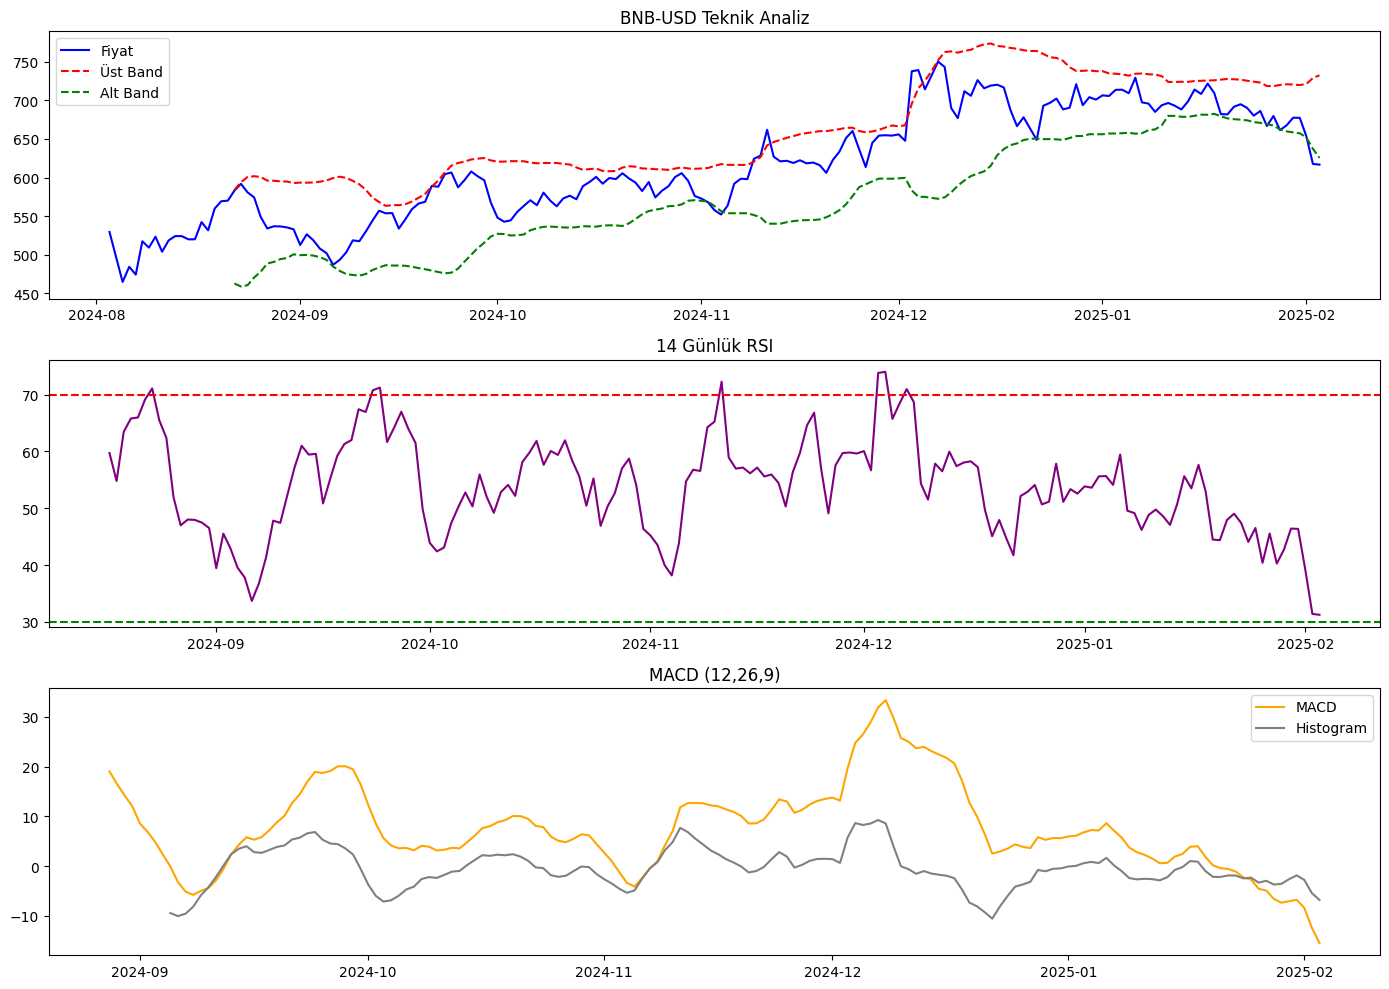


✅ Başarılı Sonuçlar:
    Sembol      Fiyat    RSI       MACD
0  BTC-USD  102247.47  52.49   744.5106
1  ETH-USD    2865.38  35.21  -100.2069
2  BNB-USD     616.77  31.25   -15.5037


In [1]:
# Gerekli kütüphaneleri yükle ve içe aktar
!pip install yfinance pandas_ta matplotlib --quiet
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Ayarlar ve Konfigürasyon
class Config:
    SYMBOL_GROUPS = {
        'CRYPTO': ['BTC-USD', 'ETH-USD', 'BNB-USD'],
        'BIST': ['GARAN.IS', 'AKBNK.IS']
    }
    TIME_INTERVAL = '1d'
    PERIOD = '6mo'
    INDICATORS = {
        'rsi': {'length': 14},
        'macd': {'fast': 12, 'slow': 26, 'signal': 9},
        'bbands': {'length': 20, 'std': 2}
    }

# 2. Geliştirilmiş Veri Yönetim Sistemi (MultiIndex ve sütun sorunu çözüldü)
class DataManager:
    @staticmethod
    def get_clean_data(symbol):
        try:
            # Veriyi indir ve sütunları düzelt
            df = yf.download(
                tickers=symbol,
                period=Config.PERIOD,
                interval=Config.TIME_INTERVAL,
                progress=False,
                group_by='ticker'  # Çoklu sembol desteği
            )

            # MultiIndex kontrolü ve düzeltme
            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.droplevel(0)

            # Gerekli sütunları kontrol et
            required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
            if not all(col in df.columns for col in required_columns):
                print(f"⚠️ Eksik sütunlar: {symbol}")
                return None

            # Veri temizleme
            df = df[required_columns].ffill().bfill()

            if len(df) < 20:
                print(f"⚠️ Yetersiz veri: {symbol} (Sadece {len(df)} veri noktası)")
                return None
            return df
        except Exception as e:
            print(f"❌ İndirme hatası: {symbol} - {str(e)}")
            return None

# 3. Hata Dayanıklı Teknik Analiz Motoru
class TechnicalAnalyzer:
    def __init__(self, df):
        self.df = df.copy()

    def add_indicators(self):
        try:
            # RSI Hesaplama
            self.df.ta.rsi(**Config.INDICATORS['rsi'], append=True)

            # MACD Hesaplama
            self.df.ta.macd(**Config.INDICATORS['macd'], append=True)

            # Bollinger Bantları
            self.df.ta.bbands(**Config.INDICATORS['bbands'], append=True)

            return True
        except Exception as e:
            print(f"📉 Gösterge hatası: {str(e)}")
            return False

# 4. Geliştirilmiş Görselleştirme
class EnhancedVisualizer:
    @staticmethod
    def plot_analysis(df, symbol):
        try:
            plt.figure(figsize=(14, 10))

            # Fiyat ve BBAND
            plt.subplot(3,1,1)
            plt.plot(df['Close'], label='Fiyat', color='blue')
            plt.plot(df['BBU_20_2.0'], label='Üst Band', linestyle='--', color='red')
            plt.plot(df['BBL_20_2.0'], label='Alt Band', linestyle='--', color='green')
            plt.title(f'{symbol} Teknik Analiz')
            plt.legend()

            # RSI
            plt.subplot(3,1,2)
            plt.plot(df['RSI_14'], label='RSI', color='purple')
            plt.axhline(70, color='red', linestyle='--')
            plt.axhline(30, color='green', linestyle='--')
            plt.title('14 Günlük RSI')

            # MACD
            plt.subplot(3,1,3)
            plt.plot(df['MACD_12_26_9'], label='MACD', color='orange')
            plt.plot(df['MACDh_12_26_9'], label='Histogram', color='gray')
            plt.title('MACD (12,26,9)')
            plt.legend()

            plt.tight_layout()
            plt.show()

        except Exception as e:
            print(f"❌ Görselleştirme hatası: {str(e)}")

# 5. Ana İşlem Fonksiyonu
def enhanced_analysis():
    results = []
    for symbol in Config.SYMBOL_GROUPS['CRYPTO']:
        print(f"\n🔍 Analiz: {symbol}")

        # Veri yükleme
        df = DataManager.get_clean_data(symbol)
        if df is None: continue

        # Göstergeleri ekle
        analyzer = TechnicalAnalyzer(df)
        if not analyzer.add_indicators(): continue

        # Sonuçları kaydet
        last_row = analyzer.df.iloc[-1]
        results.append({
            'Sembol': symbol,
            'Fiyat': f"{last_row['Close']:.2f}",
            'RSI': f"{last_row['RSI_14']:.2f}",
            'MACD': f"{last_row['MACD_12_26_9']:.4f}"
        })

        # Grafik çiz
        EnhancedVisualizer.plot_analysis(analyzer.df, symbol)

    # Sonuçları göster
    if results:
        print("\n✅ Başarılı Sonuçlar:")
        print(pd.DataFrame(results))
    else:
        print("\n❗ Sonuç bulunamadı!")

# 6. Çalıştırma
print("🚀 Teknik Analiz Başlatılıyor...")
enhanced_analysis()